# Complex Grapher
### Source Code

In [1]:
import numpy as np
import scipy
from PIL import Image, ImageDraw
import itertools
import colorsys
import time
from IPython.display import Image as displayImage
import warnings

In [2]:
def _rect(*args):
    if len(args) == 1:
        size = args[0]
    elif len(args) == 2:
        size = args
    else:
        raise TypeError("rect was expecting either 1 tuple or two ints")
    return itertools.product(range(size[0]), range(size[1]))

def _mapz(i,j,pos,size):
    z0 = pos[0]
    stretch = pos[1] - pos[0]
    z = z0 + np.real(stretch)*i/size[0] + 1j*np.imag(stretch)*j/size[1]
    return z

def _zmap(z,pos,size):
    z0 = pos[0]
    stretch = pos[1]-pos[0]
    x = (np.real(z) - np.real(z0))*size[0]/np.real(stretch)
    y = (np.imag(z) - np.imag(z0))*size[1]/np.imag(stretch)
    return (x,y)
    

def graph(f=(lambda z:z), pos=(-10+10j, 10-10j), size=(500,500), dist=0.2, axis=False, grid=False):
    img = Image.new('RGB', size)
    pix = img.load()
    draw = ImageDraw.Draw(img)
    origin = _zmap(0, pos, size)
    warnings.filterwarnings('ignore')
    for i,j in _rect(size):
        try:
            z = _mapz(i,j,pos,size)
            out = f(z)
            bri = np.absolute(out) / dist
            bri = max(0, min(1, bri))
            hue = np.angle(out, deg=True)
            hue /= 360
            if hue < 0:
                hue += 1
            col = colorsys.hsv_to_rgb(hue, 1, bri)
            col = tuple(int(i*255) for i in col)
        except:
            col = (255,)*3
        if grid:
            exp1 = np.real(z) == int(np.real(z)) and np.imag(z) == int(np.imag(z))
            exp2 = (abs(i-origin[0]) == 1) and j==origin[1]
            exp3 = (abs(j-origin[1]) == 1) and i==origin[0]
            if exp1 or exp2 or exp3:
                col = (255,255,255)
        pix[i,j] = col
    warnings.filterwarnings('default')
    if axis:
        draw.line((origin[0],0,origin[0],size[0]))
        draw.line((0,origin[1],size[1],origin[1]))
    return img

### Custom Functions

In [3]:
def spiral(z):
    return z*1j**np.absolute(z)

$\text{spiral}(z)=zi^{|z|}$

### Graphs
> Position is $z$<br>
> Colour corresponds to direction of $f(z)$<br>
> Black when $f(z)\approx 0$<br>
> While is $\frac{n}{0}\approx\infty{e^{iC_1}}, n\in\mathbb{C}$ (Error catching)<br>

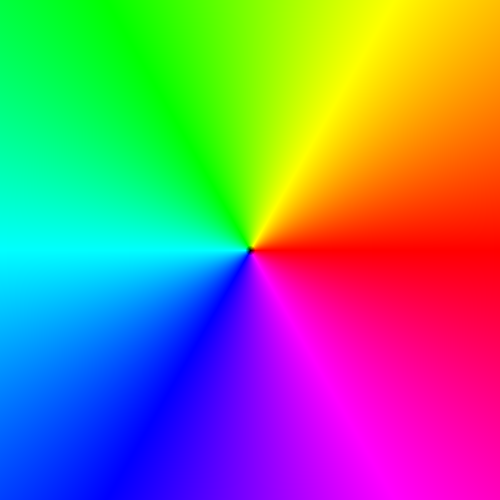

In [4]:
display(graph(f=lambda z:z))

$f(z)=z$

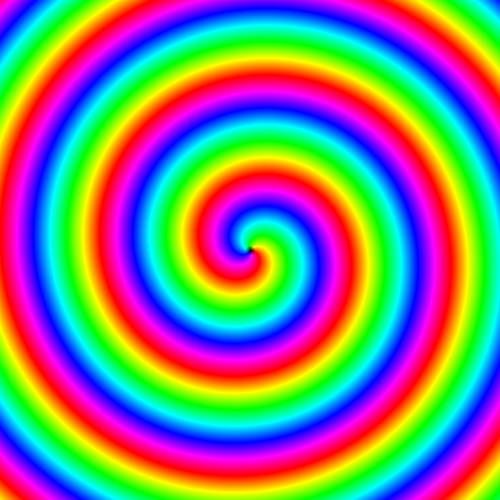

In [5]:
display(graph(f=spiral))

$f(z)=zi^{|z|}$

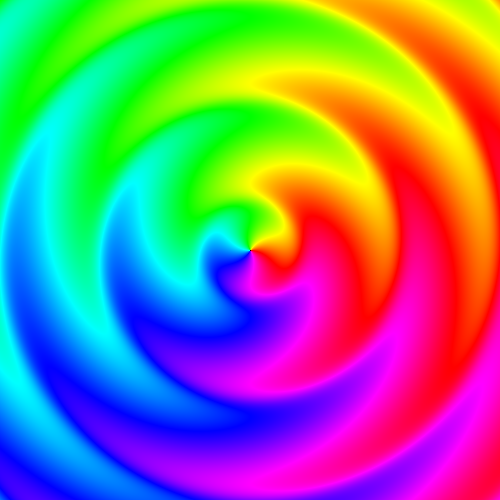

In [6]:
display(graph(f=( lambda z:2*z+spiral(z) ), pos=(-10+10j, 10-10j), dist=0.1))

$f(z)=2z+zi^{|z|}$

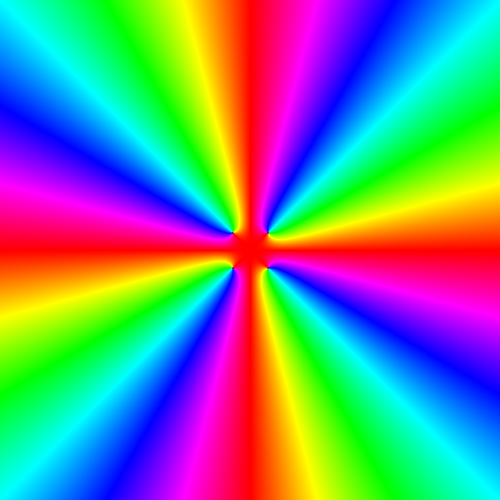

In [7]:
display(graph(f=( lambda z:(z**2-1j)*(z**2+1j) )))

$f(z)=(z^2-i)(z^2+i)$<br>
$f(z)=z^4+1$

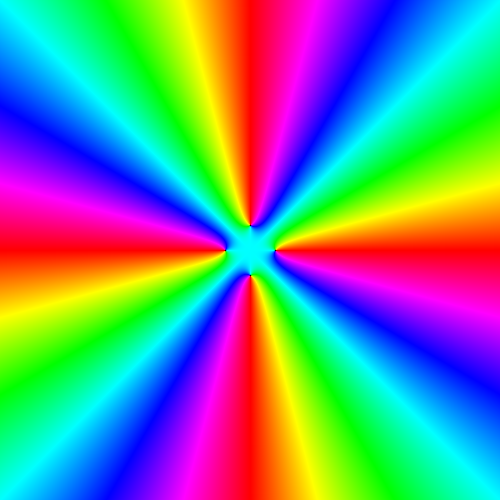

In [8]:
display(graph(f=lambda z:z**4-1 ))

$f(z)=(z^2+1)(z^2-1)$<br>
$f(z)=z^4-1$

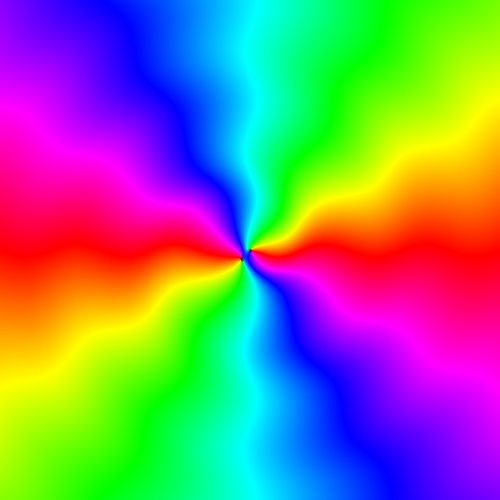

In [9]:
display(graph(f=( lambda z:2*z**2+spiral(z) ), pos=(-10+10j, 10-10j), dist=0.1))

$f(z)=2z^2+zi^{|z|}$

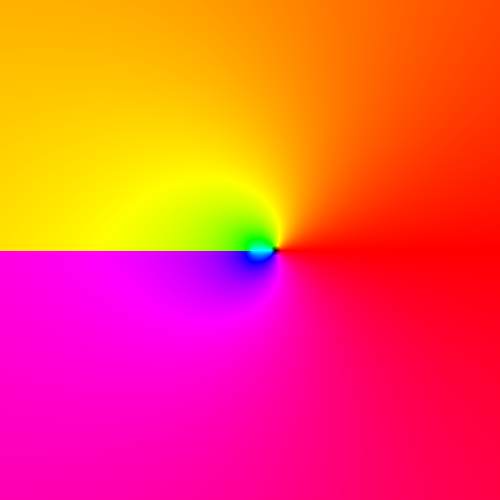

In [10]:
display(graph(f=np.log))

$f(z)=\ln(z)$

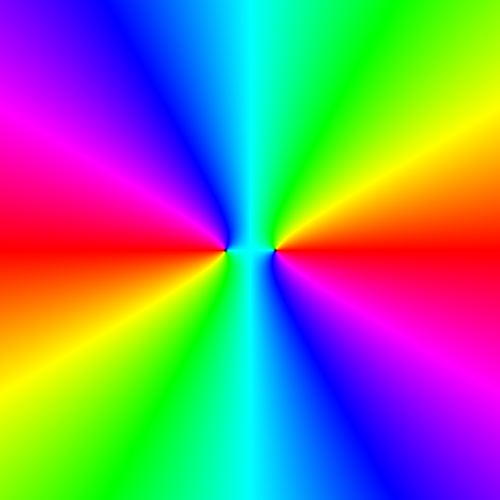

In [11]:
display(graph(f=lambda z:z**2-1))

$f(z)=z^2-1$

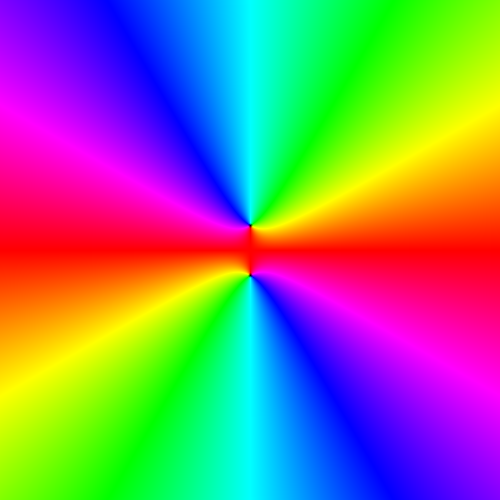

In [12]:
display(graph(f=lambda z:z**2+1))

$f(z)=z^2+1$

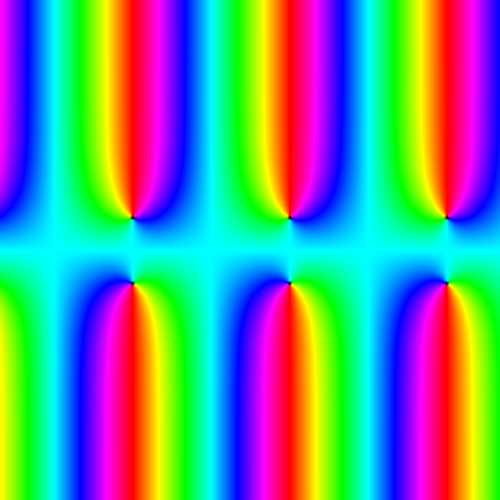

In [13]:
display(graph( f=(lambda z:np.sin(z)-2) ))

$f(z)=\sin(z)-2$<br>

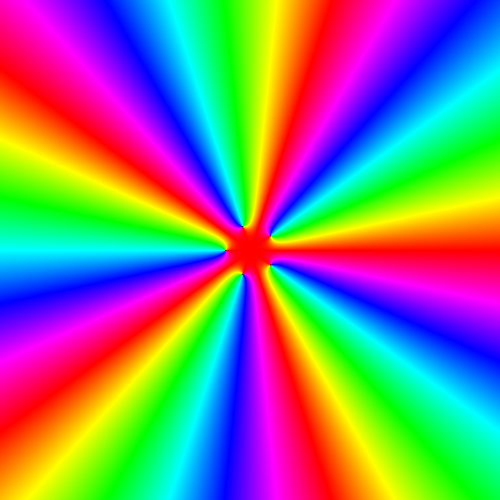

In [14]:
display(graph(  f=lambda z:z**5+1  ))

$f(z)=z^5+1$

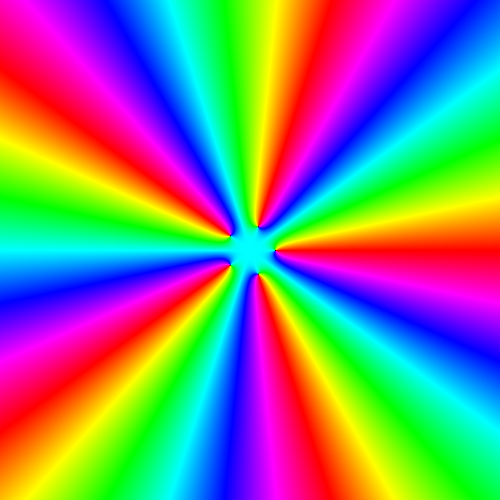

In [15]:
display(graph(  f=lambda z:z**5-1  ))

$f(z)=z^5-1$

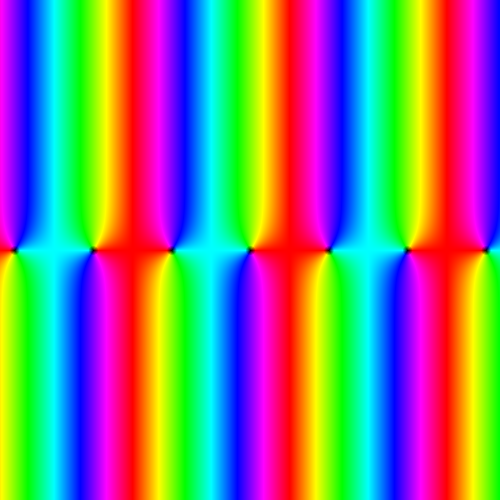

In [16]:
display(graph( f=np.sin ))

$f(z)=\sin(z)=\frac{e^{iz}-e^{-iz}}{2i}$

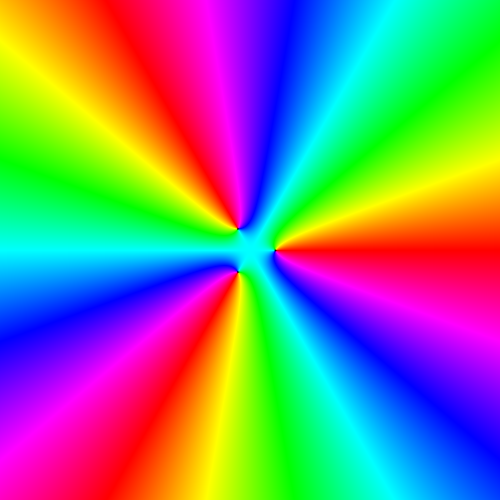

In [17]:
display(graph( f=lambda z:z**3-1 ))

$f(z)=z^3-1$

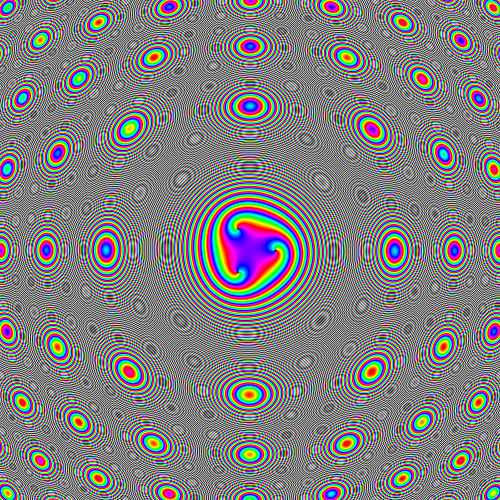

In [18]:
display(graph( f=lambda z:spiral(z**3-1) ))

$f(z)=(z^3-1)i^{|z^3-1|}$

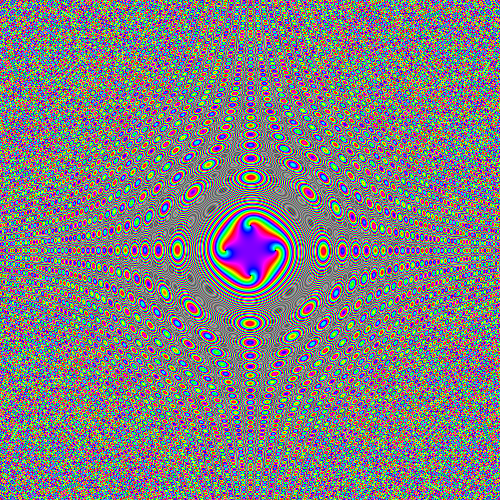

In [19]:
display(graph( f=lambda z:spiral(z**4-1) ))

$f(x)=(z^4-1)i^{|z^4-1|}$

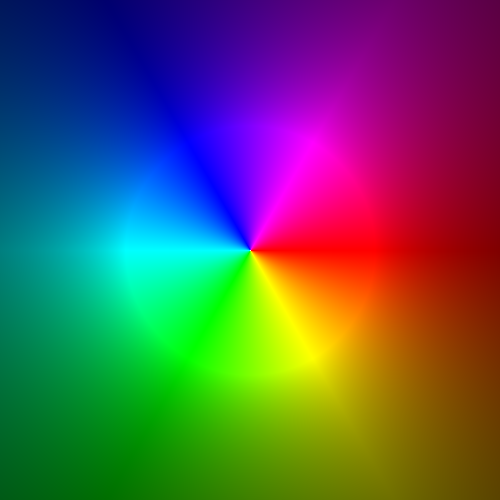

In [20]:
display(graph(f=lambda z:1/z))

$f(z)=\frac{1}{z}$

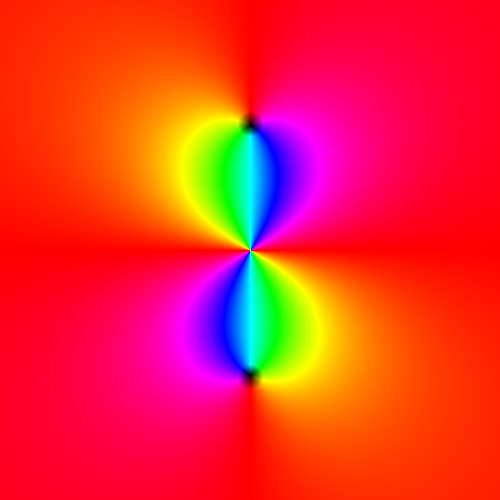

In [21]:
display(graph(f=lambda z:1/(z)**2+1, pos=(-2+2j,2-2j)))

$f(z)=\frac{1}{z^2}+1$<br>
The corners are $(-2+2i)$ and $(2-2i)$

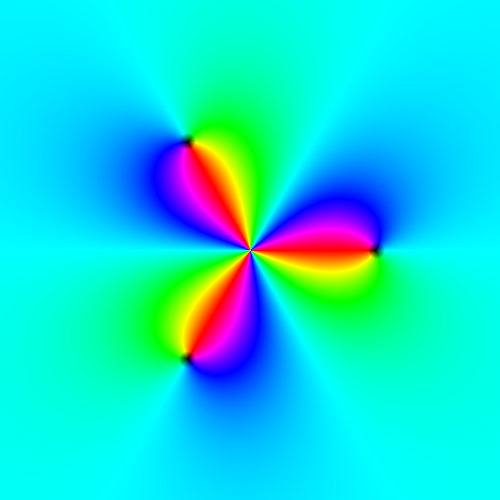

In [22]:
display(graph(f=lambda z:1/z**3-1, pos=(-2+2j, 2-2j)))

$f(z)=\frac{1}{z^3}-1$<br>
The corners are $(-2+2i)$ and $(2-2i)$

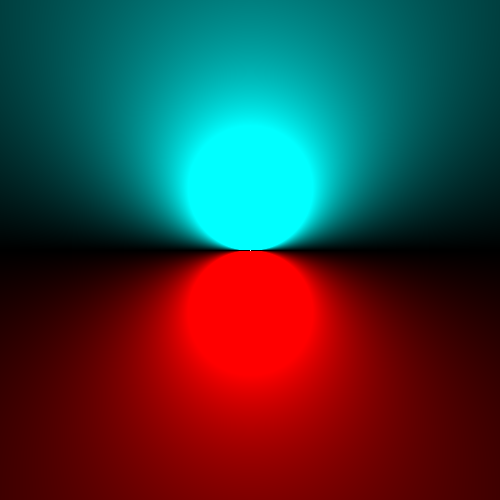

In [23]:
display(graph(f=lambda z:np.imag(1/z)))

$f(z)=\Im{(\frac{1}{z})}$

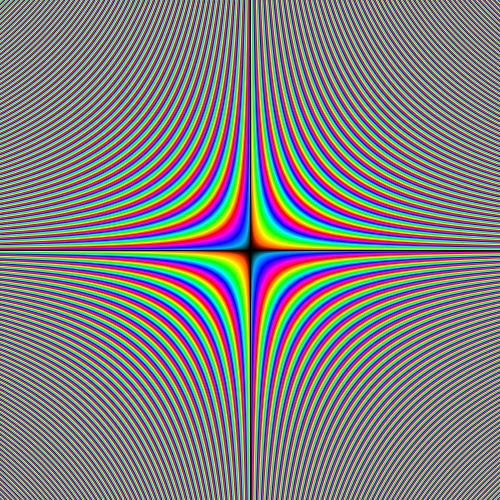

In [24]:
display(graph(f=lambda z:spiral(np.imag(z**2))))

$f(z)=\Im(z^2)i^{|\Im(z^2)|}$

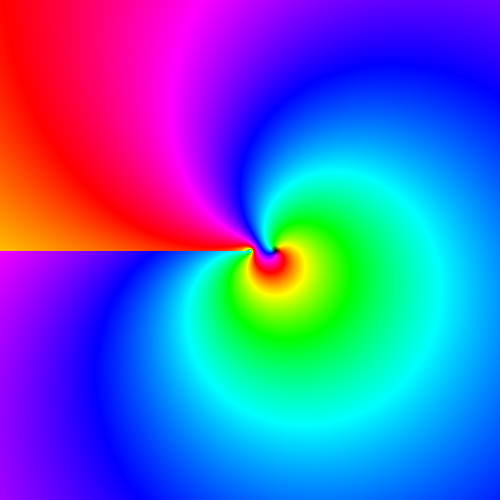

In [25]:
display(graph(f=lambda z:spiral(np.log(z))))

$f(z)=\ln(z)i^{|\ln(z)|}$